<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

# Métricas de Classificação
---

Modelos de classificação, um tipo de aplicação de Machine Learning, são utilizados para resolver problemas em que se faz necessário particionar um espaço amostral de modo que os dados sejam agrupados por semelhança ou discrepância em relação a determinadas características. 

Basicamente, modelos de classificação indicam quantas observações satisfazem uma determinada condição e quantas não a satisfazem. Na área da saúde, por exemplo, esses modelos podem ser utilizados para classificar se um paciente está saudável ou doente a partir de um teste. A detecção de fraude em transações bancárias também é outra aplicação na qual esta análise é fundamental.  

Avaliar objetivamente a solução obtida com o treinamento de um modelo de classificação é fundamental para nortear as decisões ao longo de seu desenvolvimento. As métricas de classificação são indicadores que podemos utilizar para fazer essa avaliação, por meio delas verificamos se um modelo resolve o problema proposto ou não. Além disso, também são utilizadas para comparar diferentes abordagens e decidir quais delas são mais promissoras. A seguir vamos exemplificar as principais métricas a partir da Matriz de Confusão. 

## Matriz de confusão
---

A Matriz de Confusão é, basicamente, uma tabela que resume os acertos e erros do modelo de classificação em relação ao resultado esperado. Essa matriz apresenta os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos, conforme apresentado abaixo:

<img src = "https://images2.imgbox.com/a0/ba/FqNODLoU_o.png" width="800">

Por meio dela é possível analisar o desempenho do modelo em relação a cada uma das classes de forma independente. Para ilustrar essa ideia, considere que estamos analisando a performance de um teste que detecta se um paciente está ou não gripado, ou seja, positivo significa que a pessoa está doente e negativo indica que está saudável. Dada uma amostra de 10 pacientes dos quais sabemos que 5 estão saudáveis e 5 estão doentes, suponha que o modelo de classificação performou segundo a matriz de confusão apresentada abaixo:

<img src = "https://images2.imgbox.com/8d/8b/hCLYiHXK_o.png" width="800">


Observe que a diagonal principal da matriz contém os acertos: 

- 3 pessoas **doentes** foram classificadas como **doentes** (verdadeiro positivo);

- 3 pessoas **saudáveis** foram classificadas como **saudáveis** (verdadeiro negativo).

A diagonal secundária da matriz apresenta as classificações erradas do modelo:

- 2 pessoas **saudáveis** foram classificadas como **doentes** (falso positivo);

- 2 pessoas **doentes** foram classificadas como **saudáveis** (falso negativo).

Observe que, nesse contexto, o erro de classificação pode trazer prejuízos para a saúde de um paciente. Um falso negativo significa que o modelo considerou uma pessoa doente como saudável, consequentemente o tratamento adequado pode não ser aplicado ao paciente. Analogamente um falso positivo significa que uma pessoa saudável foi considerada doente, nesse caso um tratamento desnecessário pode ser aplicado. Vale ressaltar que todos os testes diagnósticos estão sujeitos a erros e existem meios para confirmar o resultado, contudo, o ideal é que os erros de classificação sejam minimizados o quanto for possível (otimização de performance).

Podemos utilizar o Python para gerar uma matriz de confusão, o código abaixo exemplifica como programar a matriz do problema que estamos discutindo.

In [1]:
from sklearn.metrics import confusion_matrix

real_values =  [1, 0, 1, 1, 0, 0, 0, 1, 0, 1] # 1-> saudável 0-> doente
pred_values = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]

# output:
# array([[3, 2],
#           [2, 3]])
confusion_matrix(real_values , pred_values)

array([[3, 2],
       [2, 3]], dtype=int64)

A matriz de confusão também pode ser visualizada com uma tabela de cores. Para classificadores multiclasse, termo usado para casos em que há mais de duas classes no conjunto de dados (dataset), essa visualização se torna bastante útil. Abaixo um exemplo de como programar a tabela de cores no Python.

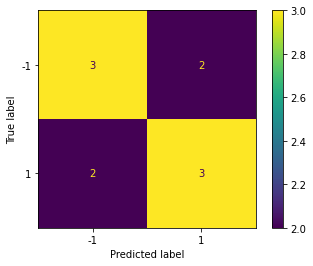

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression as logreg

real_values =  [1, 0, 1, 1, 0, 0, 0, 1, 0, 1] # 1-> saudável 0-> doente
pred_values = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
logreg.classes_ = np.array([-1, 1])

cm = confusion_matrix(real_values, pred_values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

disp.plot(values_format='d');

Após contar todos os positivos e negativos, verdadeiros ou falsos, e obter a matriz de confusão podemos calcular as métricas de classificação para avaliar o modelo. Nesse momento focaremos nas principais métricas: acurácia, precision (precisão), recall (sensibilidade ou  revocação), Curva ROC (Receiver Operating Characteristic – Característica de Operação do Receptor) e AUC (Area Under the Curve –  Área sob a curva). 

É importante destacar que não existem valores de acurácia, ou qualquer outra métrica, que sejam pré-estabelecidos como “adequados”. Os valores adequados para cada métrica devem ser avaliados no contexto de negócio em que o modelo será utilizado. 

## Acurácia
---

A acurácia (acc) verifica a taxa de acertos do modelo de classificação, ela é calculada pela razão entre o total de acertos e o total de amostras.

<img src = "https://images2.imgbox.com/1c/8e/57bDP1yc_o.png" width="300">


Essa métrica representa a proporção de verdadeiros positivos e verdadeiros negativos identificados pelo modelo, sendo um bom indicador da performance geral do modelo. Observe que na acurácia não fazemos distinção entre a taxa de acertos e erros das diferentes classes que existem no dataset.

O código abaixo ilustra como calculamos a acurácia para o modelo de classificação de pessoas doentes e saudáveis usando o Python.

In [3]:
from sklearn.metrics import accuracy_score

real_values =  [1, 0, 1, 1, 0, 0, 0, 1, 0, 1] # 1-> saudável 0-> doente
pred_values = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]

accuracy_score(real_values , pred_values) # Output: 0.60 (60% de acurácia)

0.6

## Precision e Recall
---


As métricas precision e recall avaliam a taxa de erros e acertos de cada uma das classes do modelo. Estas métricas são calculadas a partir da matriz de confusão.

<img src = "https://images2.imgbox.com/ed/c2/F8oUB30a_o.png" width="500">


Usualmente a precisão (precision) é adequada para situações em que os falsos positivos são mais prejudiciais que falsos negativos. Por exemplo, partindo do contexto do teste de gripe, a precisão é apropriada caso seja mais importante ter certeza que os paciente com resultado positivo realmente estão doentes, do que garantir que nenhuma pessoa doente seja classificada como saudável.

Analogamente, a sensibilidade (recall) é adequada para casos em que falsos negativos são mais prejudiciais que falsos positivos, isto é, é mais importante garantir que todos os pacientes doentes foram identificados do que evitar que pacientes saudáveis sejam considerados doentes.

Em resumo podemos ler essas duas métricas como:

- Precision: dentre todas as pessoas classificadas como doentes, quantas estavam realmente doentes?

- Recall: dentre todas as pessoas que estavam realmente doentes, quantas foram classificadas corretamente?

O código abaixo ilustra como calculamos a precisão e sensibilidade para o modelo de classificação de pessoas doentes e saudáveis usando o Python.

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

real_values =  [1, 0, 1, 1, 0, 0, 0, 1, 0, 1] # 1-> saudável 0-> doente
pred_values = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]

precision_score(real_values , pred_values) # output: 0.6
recall_score(real_values , pred_values) # output: 0.6

0.6

Os resultados obtidos pelo código acima podem ser lidos como:

- Precision: dentre todas as pessoas classificadas como doentes, 60% estavam realmente doentes;

- Recall: dentre todas as pessoas que estavam realmente doentes, 60% foram identificadas corretamente.

Para compreender melhor esses conceitos veja o seguinte vídeo (possui legendas em português, basta ativá-las): https://youtu.be/jr_BcU4QlNE 

## Curva ROC (Receiver Operating Characteristic) e AUC (Area Under the Curve)
---

A regressão logística, assim como alguns outros métodos de classificação, nos permite alterar o threshold (limiar do modelo). O valor padrão do threshold é 0.5, o que significa que todas as amostras com mais de 50% de probabilidade são de uma determinada classe e as demais amostras, abaixo de 50%, são da outra classe. No entanto, este valor pode ser modificado com o objetivo de melhorar a performance do modelo. O ajuste deste valor se torna ainda mais importante ao se trabalhar com datasets desbalanceados (muito mais amostras de uma determinada classe do que outra).

É possível avaliar a classificação obtida pelo modelo variando o threshold entre 0 e 1. Para cada valor de threshold você irá obter uma matriz de confusão diferente. Uma forma de avaliar a performance de um determinado modelo de classificação é calcular duas métricas da matriz de confusão (recall e especificidade) e expressá-las em um gráfico.

A sensibilidade foi explicada anteriormente. A especificidade é uma métrica que avalia a capacidade do modelo de detectar resultados negativos.

<img src = "https://images2.imgbox.com/97/39/jmAp9Uco_o.png" width="500">

O gráfico de sensibilidade versus especificidade é conhecido como Curva ROC (ou curva característica de operação de receptor). Nesse gráfico o eixo Y representa a sensibilidade, ou seja, quanto maior a sensibilidade do teste mais próximo de 1 ele estará (ponto alto), quanto menor a sensibilidade mais próximo de 0 (ponto baixo). 

Analogamente, o eixo X representa 1-especificidade. Assim, quanto mais perto de 0 maior a especificidade (ponto no começo do eixo), quanto mais perto de 1 menor a especificidade (ponto no final do eixo). Em virtude disso dizemos que quanto mais próximo de 1 a sensitividade melhor.  Para a especificidade, quanto mais próximo de 0 melhor. Logo, concluímos que quanto mais para cima e esquerda o ponto estiver, melhor é o teste.

A partir da curva ROC podemos calcular a AUC (Area Under the Curve) uma variável estatística que representa a área abaixo da curva. A AUC é útil para determinar quais curvas tem melhor performance, para entender como isso funciona observe a figura abaixo. 

<img src = "https://images2.imgbox.com/54/8d/k8lUBLlO_o.png" width="800">

Devido às características da curva ROC, modelos de baixa performance terão curvas mais “baixas” (próximas da linha pontilhada) e com menor área abaixo da curva (AUC mais próximo de 0). Analogamente modelos com melhor performance terão a curva mais “alta” (próxima do canto superior esquerdo, como a curva laranja) e maior área abaixo da curva (AUC mais próximo de 1). 

A curva ROC nos ajuda a determinar o melhor threshold para um determinado problema. Em outras palavras, podemos escolher o modelo que tem a menor taxa de falso positivo e que, simultaneamente, apresenta a melhor sensitividade.

O código abaixo ilustra como esboçamos a **curva ROC** usando o Python.

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(X, y)

plot_roc_curve(logreg, X, y)

Os gráficos abaixo foram gerados com duas abordagens de modelagem distintas, Árvores de Decisão e Regressão Logística. O desempenho dos dois modelos é bem diferente. A abordagem utilizando Árvores de Decisão apresenta uma AUC de 0.98, uma performance superior à do modelo de Regressão Logística. Esse é um exemplo de como podemos usar essas métricas para avaliar um modelo.

<img src = "https://images2.imgbox.com/f0/ea/HcRJ7CoS_o.png" width="700">


## Por fim…

Utilizando o problema de classificação de pacientes doentes e saudáveis refletimos sobre a relação entre contexto de negócio e as métricas do modelo. A classificação errada de um paciente doente como saudável pode ser extremamente danosa, uma vez que ele pode perder um tempo valioso para o tratamento da doença. Ao passo que um paciente saudável e classificado como doente pode ser submetido a outros exames, aumentando os custos do diagnóstico.

As métricas de classificação nos permitem fazer uma avaliação objetiva sobre o desenvolvimento e performance do modelo, podendo ser utilizadas também para a implementação da solução. Vale ressaltar que não se deve pensar em uma métrica como melhor ou pior que a outra, mas sim, analisar o problema dentro de seu contexto e escolher a (ou as) que melhor se adapta(m). Aproveite para refletir sobre problemas de classificação similares e faça esta análise.

---